In [1]:
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource
from itertools import product
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
df = pd.read_csv('avocado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [3]:

df = df['region'].str.get_dummies(';').add_prefix('Has_')


In [4]:
def label_race (row):
    if row['Has_Albany'] == 1 :
      return '1'
    if row['Has_Atlanta'] == 1 :
      return '1'
    if row['Has_BaltimoreWashington'] == 1 :
      return '1'
    if row['Has_Boise'] == 1 :
      return '3'
    if row['Has_Boston'] == 1 :
      return '1'
    if row['Has_BuffaloRochester'] == 1 :
      return '1'
    if row['Has_California'] == 1 :
      return '3'
    if row['Has_Charlotte'] == 1 :
      return '1'
    if row['Has_Chicago'] == 1 :
      return '2'
    if row['Has_CincinnatiDayton'] == 1 :
      return '2'
    if row['Has_Columbus'] == 1 :
      return '1'
    if row['Has_DallasFtWorth'] == 1 :
      return '2'
    if row['Has_Denver'] == 1 :
      return '2'
    if row['Has_Detroit'] == 1 :
      return '2'
    if row['Has_GrandRapids'] == 1 :
      return '2'
    if row['Has_GreatLakes'] == 1 :
      return '2'
    if row['Has_HarrisburgScranton'] == 1 :
      return '1'
    if row['Has_HartfordSpringfield'] == 1 :
      return '2'
    if row['Has_Jacksonville'] == 1 :
      return '1'
    if row['Has_LasVegas'] == 1 :
      return '3'
    if row['Has_Houston'] == 1 :
      return '1'
    if row['Has_Midsouth'] == 1 :
      return '2'
    if row['Has_PhoenixTucson'] == 1 :
      return '3'
    if row['Has_Philadelphia'] == 1 :
      return '1'
    if row['Has_Louisville'] == 1 :
      return '2'
    if row['Has_Portland'] == 1 :
      return '3'
    if row['Has_MiamiFtLauderdale'] == 1 :
      return '1'
    if row['Has_Nashville'] == 1 :
      return '2'
    if row['Has_Northeast'] == 1 :
      return '1'
    if row['Has_Indianapolis'] == 1 :
      return '2'
    if row['Has_NewYork'] == 1 :
      return '1'
    if row['Has_NewOrleansMobile'] == 1 :
      return '2'
    if row['Has_NorthernNewEngland'] == 1 :
      return '1'
    if row['Has_Orlando'] == 1 :
      return '1'
    if row['Has_Pittsburgh'] == 1 :
      return '1'
    if row['Has_RaleighGreensboro'] == 1 :
      return '1'
    if row['Has_Plains'] == 1 :
      return '2'
    if row['Has_NewOrleansMobile'] == 1 :
      return '2'
    if row['Has_RichmondNorfolk'] == 1 :
      return '1'
    if row['Has_Roanoke'] == 1 :
      return '1'
    if row['Has_SouthCentral'] == 1 :
      return '2'
    if row['Has_Sacramento'] == 1 :
      return '3'
    if row['Has_MiamiFtLauderdale'] == 1 :
      return '1'
    if row['Has_SanDiego'] == 1 :
      return '3'
    if row['Has_SanFrancisco'] == 1 :
      return '3'
    if row['Has_SouthCarolina'] == 1 :
      return '3'
    if row['Has_Southeast'] == 1 :
      return '1'
    if row['Has_Spokane'] == 1 :
      return '3'
    if row['Has_StLouis'] == 1 :
      return '2'
    if row['Has_TotalUS'] == 1 :
      return '2'
    if row['Has_West'] == 1 :
      return '3'
    if row['Has_WestTexNewMexico'] == 1 :
      return '3'
    if row['Has_Syracuse'] == 1 :
      return '1'
    if row['Has_Tampa'] == 1 :
      return '1'


In [5]:
df.apply (lambda row: label_race(row), axis=1)

0        1
1        1
2        1
3        1
4        1
        ..
18244    3
18245    3
18246    3
18247    3
18248    3
Length: 18249, dtype: object

In [6]:
df['regions'] = df.apply (lambda row: label_race(row), axis=1)

In [7]:
df.drop(['Has_Albany','Has_Atlanta','Has_BaltimoreWashington','Has_Boise','Has_Boston','Has_BuffaloRochester','Has_California','Has_Charlotte','Has_Chicago','Has_CincinnatiDayton','Has_Columbus','Has_DallasFtWorth','Has_Denver','Has_Detroit','Has_GrandRapids','Has_GreatLakes','Has_HarrisburgScranton','Has_HartfordSpringfield','Has_Houston','Has_Indianapolis','Has_Jacksonville','Has_LasVegas','Has_LosAngeles','Has_Louisville','Has_MiamiFtLauderdale','Has_Midsouth','Has_Nashville','Has_NewOrleansMobile','Has_NewYork','Has_Northeast','Has_NorthernNewEngland','Has_Orlando','Has_Philadelphia','Has_PhoenixTucson','Has_Pittsburgh','Has_Albany','Has_Atlanta','Has_BaltimoreWashington','Has_Boise','Has_Boston','Has_BuffaloRochester','Has_California','Has_Charlotte','Has_Chicago','Has_CincinnatiDayton','Has_Columbus','Has_DallasFtWorth','Has_Denver','Has_Detroit','Has_GrandRapids','Has_GreatLakes','Has_HarrisburgScranton','Has_HartfordSpringfield','Has_Houston','Has_Indianapolis','Has_Jacksonville','Has_LasVegas','Has_LosAngeles','Has_Louisville','Has_MiamiFtLauderdale','Has_Midsouth','Has_Nashville','Has_NewOrleansMobile','Has_NewYork','Has_Northeast','Has_NorthernNewEngland','Has_Orlando','Has_Philadelphia','Has_PhoenixTucson','Has_Pittsburgh','Has_Plains','Has_Portland','Has_RaleighGreensboro','Has_RichmondNorfolk','Has_Roanoke','Has_Sacramento','Has_SanDiego','Has_SanFrancisco','Has_Seattle','Has_SouthCarolina','Has_SouthCentral','Has_Southeast','Has_Spokane','Has_StLouis','Has_Syracuse','Has_Tampa','Has_TotalUS','Has_West','Has_WestTexNewMexico'], axis=1, inplace=True)

In [8]:
df.head()

,regions
0,1
1,1
2,1
3,1
4,1


In [9]:
df1 = pd.read_csv('avocado.csv')
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany


In [10]:
df1.drop(['Unnamed: 0','region'], axis=1, inplace=True)

In [11]:
dfm = pd.concat([df1, df], axis=1)

In [12]:
dfm.Date = pd.to_datetime(dfm.Date)

In [13]:
dfm["day"] = dfm.Date.dt.day
dfm["week"] = dfm.Date.dt.week
dfm["month"] = dfm.Date.dt.month
dfm["year"] = dfm.Date.dt.year

In [14]:
dfm.drop(['Date'], axis=1, inplace=True)

In [15]:
le = LabelEncoder()
le.fit(dfm.type.drop_duplicates()) 
dfm.type = le.transform(dfm.type)


In [16]:
dfm.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,regions,day,week,month
0,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,0,2015,1,27,52,12
1,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,0,2015,1,20,51,12
2,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,0,2015,1,13,50,12
3,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,0,2015,1,6,49,12
4,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,0,2015,1,29,48,11


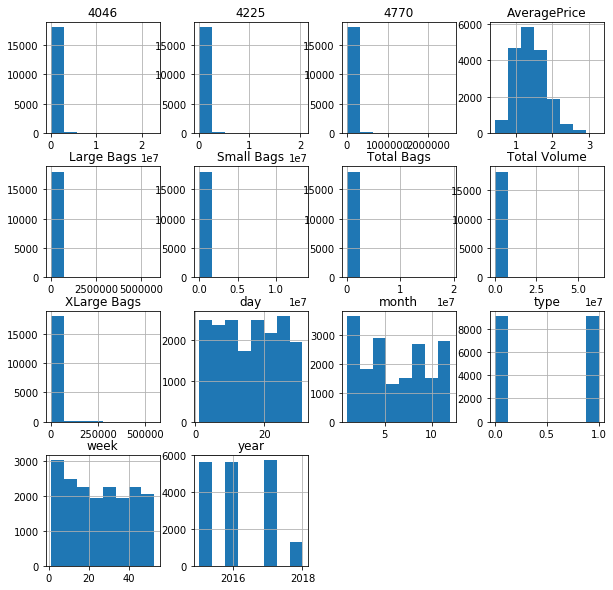

In [17]:
dfm.hist(bins=8, figsize=(10,10))
plt.show()

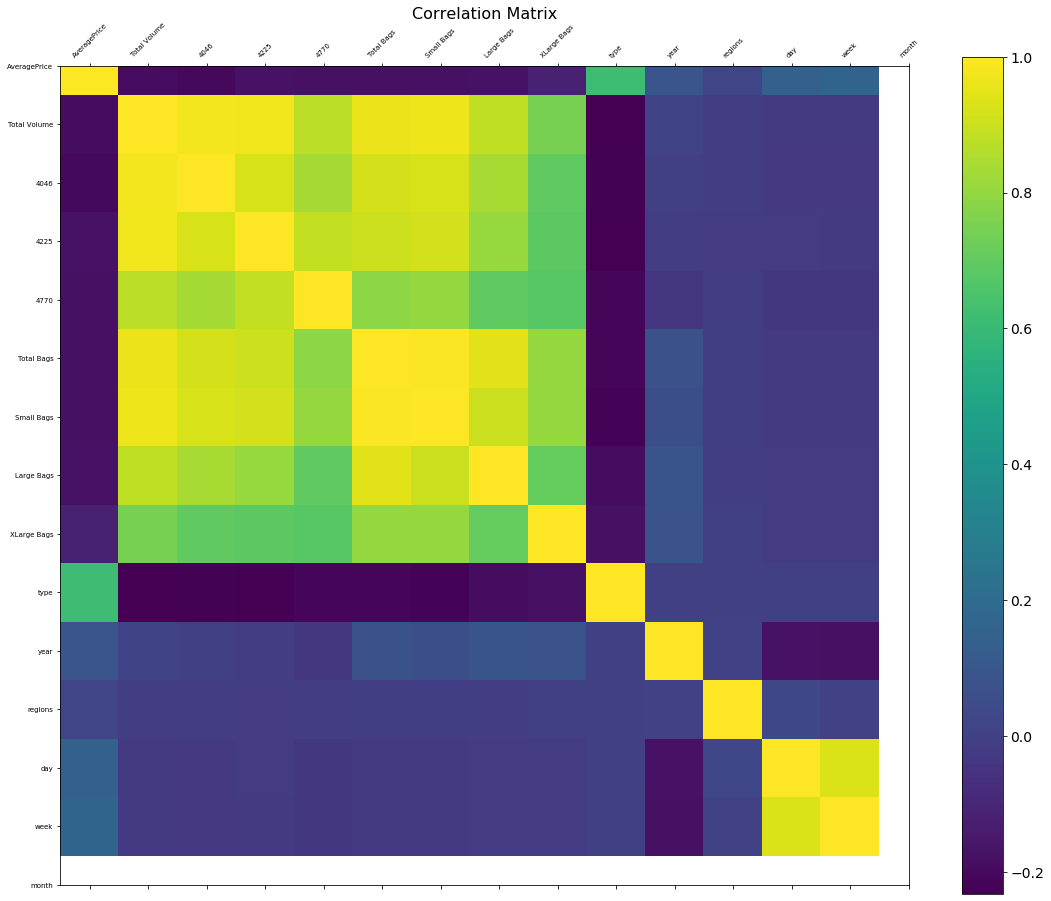

In [19]:

f = plt.figure(figsize=(19, 15))
plt.matshow(dfm.corr(), fignum=f.number)
plt.xticks(range(dfm.shape[1]), dfm.columns, fontsize=7, rotation=45)
plt.yticks(range(dfm.shape[1]), dfm.columns, fontsize=7)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [20]:
np.random.seed(42)
mask = np.random.rand(dfm.shape[0]) <= 0.7
#mask - train group , ~mask - test group
print('Train set shape {0}, test set shape {1}'.format(dfm[mask].shape, dfm[~mask].shape))

Train set shape (12846, 15), test set shape (5403, 15)


In [21]:
lr=LinearRegression()
lr.fit(dfm[mask].drop(['AveragePrice','regions'], axis=1),
       dfm[mask]['AveragePrice'])

pred1 = lr.predict(dfm[~mask].drop(['AveragePrice','regions'],   
                          axis=1))

print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((pred1-dfm[~mask]['AveragePrice'])**2))))

RMSE = 0.3013


In [22]:

pd.DataFrame(lr.coef_, columns=['coeficient'],
    index=dfm[mask].drop(['AveragePrice','regions'], axis=1).columns,
             ).sort_values(by='coeficient')

,coeficient
Total Bags,-0.03
week,-0.00
Total Volume,-0.00
4770,0.00
4046,0.00
4225,0.00
day,0.00
month,0.03
Large Bags,0.03
Small Bags,0.03


In [23]:

from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(dfm[mask].drop(['AveragePrice','regions'], axis=1),
       dfm[mask]['AveragePrice'])

pred2 = lasso.predict(dfm[~mask].drop(['AveragePrice','regions'],   
                          axis=1))

print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((pred1-dfm[~mask]['AveragePrice'])**2))))

RMSE = 0.3013


C:\Users\2019\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612.8815926938577, tolerance: 0.20727782642378953
  positive)


In [24]:
pd.DataFrame(lasso.coef_, columns=['coeficient'],
    index=dfm[mask].drop(['AveragePrice','regions'], axis=1).columns,
             ).sort_values(by='coeficient')

,coeficient
4770,-0.00
Large Bags,-0.00
4046,-0.00
Total Volume,-0.00
week,0.00
Small Bags,0.00
Total Bags,0.00
4225,0.00
XLarge Bags,0.00
day,0.00


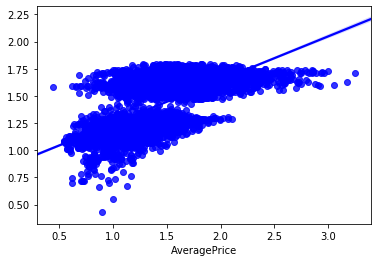

In [25]:
sns.regplot(dfm[~mask].AveragePrice,pred2, color='blue')

In [26]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50)
rf.fit(dfm[mask].drop(['AveragePrice','regions'], axis=1),
       dfm[mask]['AveragePrice'])

pred3 = rf.predict(dfm[~mask].drop(['AveragePrice','regions'],   
                          axis=1))

print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((pred1-dfm[~mask]['AveragePrice'])**2))))

RMSE = 0.3013


In [27]:
score1=rf.score(dfm[~mask].drop(['AveragePrice','regions'],  
                          axis=1),
      dfm[~mask]['AveragePrice'])
score2=rf.score(dfm[mask].drop(['AveragePrice','regions'],  
                          axis=1),
      dfm[mask]['AveragePrice'])
print ("training score:{0:.02f}".format(score2))
print ("test score:{0:.02f} ".format(score1))

training score:0.98
test score:0.87 


In [28]:
pd.DataFrame(rf.feature_importances_,
             index=dfm[mask].drop(['AveragePrice','regions'], axis=1).columns)

,0
Total Volume,0.03
4046,0.10
4225,0.08
4770,0.04
Total Bags,0.04
Small Bags,0.04
Large Bags,0.09
XLarge Bags,0.01
type,0.37
year,0.07


In [29]:

from sklearn.ensemble import VotingRegressor
ereg = VotingRegressor(estimators=[ ('lr', lr),('RandomForest', rf), ('lasso', lasso)])
ereg.fit(dfm[mask].drop(['AveragePrice','regions'], axis=1),
       dfm[mask]['AveragePrice'])
pred4 = ereg.predict(dfm[~mask].drop(['AveragePrice','regions'], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred4 - dfm[~mask]['AveragePrice'])**2))))

RMSE = 0.2359


C:\Users\2019\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612.8815926938577, tolerance: 0.20727782642378953
  positive)
